In [28]:
import cv2
import matplotlib.pyplot as plt

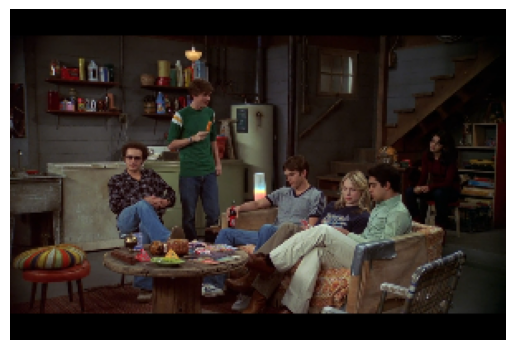

(200, 300, 3)


In [29]:
image = cv2.imread('sample_pic.png')
plt.axis("off")
image = cv2.resize(image,(300,200))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
print(image.shape)

### As images are passed as arrays in openCV, therefore, we use slicing to crop an image
### The syntax to crop an image is : image[start_x:end_x, start_y:end_y]

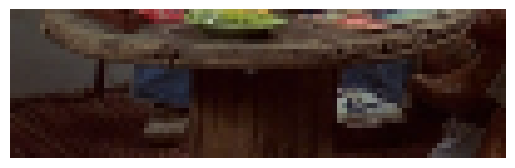

(30, 100, 3)


In [30]:
cropped_image = image[150:180,50:150] # Cropping using slicing
plt.axis("off")
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()
print(cropped_image.shape)

## Patch Generation

In [31]:
img = cv2.imread('sample_pic.png')
image_copy = img.copy()

In [32]:
img.shape

(960, 1440, 3)

In [33]:
imgheight = img.shape[0]
imgwidth = img.shape[1]

In [34]:
M = 320
N = 480
x1 = 0
y1 = 0

In [35]:
for y in range(0, imgheight, M):
  for x in range(0, imgwidth, N):
    if (imgheight-y) < M or (imgwidth-x) < N:
      break

    y1 = y+M
    x1 = x+N

    # check whether th epatch widdth or height exceeds th eimage width or height
    if x1>= imgwidth and y1 >= imgheight:
      x1 = imgwidth - 1
      y1 = imgheight - 1
      #Crop into patches of size MxN
      tiles = image_copy[y:y+M, x:x+N]
      #Save each patch into file directory
      cv2.imwrite('saved_patches/'+'title'+str(x)+'_'+str(y)+'.jpg', tiles)
      cv2.rectangle(img, (x,y), (x1,y1), (0,255,0), 1)
    elif y1 >= imgheight: # when patch height exceeds the image height
      y1 = imgheight-1
      #Crop into patches of size MxN
      tiles = image_copy[y:y+M, x:x+N]
      #Save each patch into file directory
      cv2.imwrite('saved_patches/'+'title'+str(x)+'_'+str(y)+'.jpg', tiles)
      cv2.rectangle(img, (x,y), (x1,y1),(0,255,0),1)
    elif y1 >= imgwidth: # when patch width exceeds the image width
      y1 = imgwidth-1
      #Crop into patches of size MxN
      tiles = image_copy[y:y+M, x:x+N]
      #Save each patch into file directory
      cv2.imwrite('saved_patches/'+'title'+str(x)+'_'+str(y)+'.jpg', tiles)
      cv2.rectangle(img, (x,y), (x1,y1),(0,255,0),1)
    else:
      tiles = image_copy[y:y+M, x:x+N]
      #Save each patch into file directory
      cv2.imwrite('saved_patches/'+'title'+str(x)+'_'+str(y)+'.jpg', tiles)
      cv2.rectangle(img, (x,y), (x1,y1),(0,255,0),1)

True

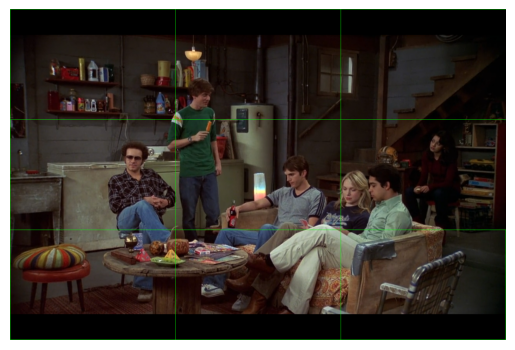

In [36]:
#Save full image into file directory
plt.imshow(img[:,:,::-1])
plt.axis('off')
cv2.imwrite('patched.jpg', img)